In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from math import radians, sin, cos, sqrt, atan2
import requests

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
# 공통 경로 설정
base_path = '/content/drive/MyDrive/Olist_ALL/'

# 각 데이터셋 로딩
orders_df = pd.read_csv(base_path + 'olist_orders_dataset.csv')
items_df = pd.read_csv(base_path + 'olist_order_items_dataset.csv')
payments_df = pd.read_csv(base_path + 'olist_order_payments_dataset.csv')
products_df = pd.read_csv(base_path + 'olist_products_dataset_translated.csv')
sellers_df = pd.read_csv(base_path + 'olist_sellers_dataset.csv')
customers_df = pd.read_csv(base_path + 'olist_customers_dataset.csv')
geolocation_df = pd.read_csv(base_path + 'olist_geolocation_dataset.csv')
reviews_df = pd.read_csv(base_path + 'olist_order_reviews_dataset.csv')

cd = pd.read_csv(base_path + 'closed_cleaned.csv')
metrics_df = pd.read_csv(base_path + 'seller_metrics_all_fillna.csv')
merged_df = pd.read_csv(base_path + 'merged.csv')
categories_df = pd.read_csv(base_path + 'categories.csv')
cluster_df = pd.read_csv(base_path + 'clustered_seller.csv')

In [ ]:
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
cluster_df

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,within_2_days_rate,avg_response_time_hours,cluster
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00,1,3.67,3.0,2,0.67,35.837222,2
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77,2,3.90,236.0,171,0.72,45.368498,1
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56,1,3.98,56.0,43,0.77,38.553333,1
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00,0,5.00,1.0,1,1.00,9.096389,2
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79,1,4.13,173.0,127,0.73,51.274904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,7,11,28,2519.44,1,0.04,1.20,0.63,8,4.30,30.0,24,0.80,38.619583,1
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,10,18,3607.52,0,0.00,1.19,0.68,2,4.25,20.0,12,0.60,43.066736,0
3050,ffeee66ac5d5a62fe688b9d26f83f534,7,107,14,2259.55,2,0.14,0.94,0.64,1,4.21,14.0,10,0.71,38.225972,0
3051,fffd5413c0700ac820c7069d66d98c89,14,2,59,12700.50,7,0.12,0.69,0.85,3,3.87,60.0,49,0.82,75.085241,1


In [ ]:
cluster_df['cluster'].value_counts()

,count
cluster,
0,1263
1,759
2,737
3,294


In [ ]:
metrics_df.describe(percentiles=[.10, .70, .75, .80, .85, .90, .95, .99])

,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,within_2_days_rate
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.00000,3053.000000,3053.000000,3053.000000,3053.000000
mean,5.341631,135.247625,32.604651,6602.088300,2.144448,0.064271,0.627606,0.811071,2.06682,4.003007,36.787422,26.310187,0.725683
std,4.974466,167.447747,105.569649,21628.978494,7.915786,0.147193,0.486025,0.166097,2.10849,0.934998,119.941241,85.611464,0.248168
min,1.000000,-5.000000,1.000000,12.220000,0.000000,0.000000,-0.000000,0.330000,0.00000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,6.000000,1.000000,119.010000,0.000000,0.000000,0.000000,0.570000,1.00000,2.950000,1.000000,1.000000,0.500000
50%,3.000000,45.000000,7.000000,1258.800000,0.000000,0.000000,0.800000,0.800000,1.00000,4.180000,8.000000,6.000000,0.740000
70%,6.000000,166.000000,16.000000,3773.736000,1.000000,0.060000,0.980000,1.000000,2.00000,4.500000,19.000000,13.000000,0.870000
75%,7.000000,216.000000,22.000000,4916.180000,1.000000,0.070000,1.000000,1.000000,2.00000,4.620000,25.000000,18.000000,1.000000
80%,9.000000,274.000000,31.000000,6788.342000,2.000000,0.090000,1.030000,1.000000,3.00000,4.750000,35.000000,25.000000,1.000000
85%,11.000000,334.000000,45.000000,9552.448000,3.000000,0.120000,1.100000,1.000000,3.00000,5.000000,51.000000,37.000000,1.000000


In [ ]:
percentiles = np.arange(0.70, 0.99, 0.01)
metrics_df.describe(percentiles=percentiles)

,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,within_2_days_rate
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.00000,3053.000000,3053.000000,3053.000000,3053.000000
mean,5.341631,135.247625,32.604651,6602.088300,2.144448,0.064271,0.627606,0.811071,2.06682,4.003007,36.787422,26.310187,0.725683
std,4.974466,167.447747,105.569649,21628.978494,7.915786,0.147193,0.486025,0.166097,2.10849,0.934998,119.941241,85.611464,0.248168
min,1.000000,-5.000000,1.000000,12.220000,0.000000,0.000000,-0.000000,0.330000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,45.000000,7.000000,1258.800000,0.000000,0.000000,0.800000,0.800000,1.00000,4.180000,8.000000,6.000000,0.740000
70%,6.000000,166.000000,16.000000,3773.736000,1.000000,0.060000,0.980000,1.000000,2.00000,4.500000,19.000000,13.000000,0.870000
71%,6.000000,178.000000,17.000000,4004.432800,1.000000,0.060000,0.990000,1.000000,2.00000,4.500000,20.000000,14.000000,0.880000
72%,7.000000,187.440000,18.000000,4206.250400,1.000000,0.060000,0.990000,1.000000,2.00000,4.530000,21.000000,15.000000,0.890000
73%,7.000000,196.960000,19.000000,4424.728000,1.000000,0.070000,1.000000,1.000000,2.00000,4.560000,22.000000,16.000000,0.910000
74%,7.000000,207.000000,21.000000,4616.912000,1.000000,0.070000,1.000000,1.000000,2.00000,4.600000,23.000000,17.000000,0.940000


## 배송관련

### 지연율

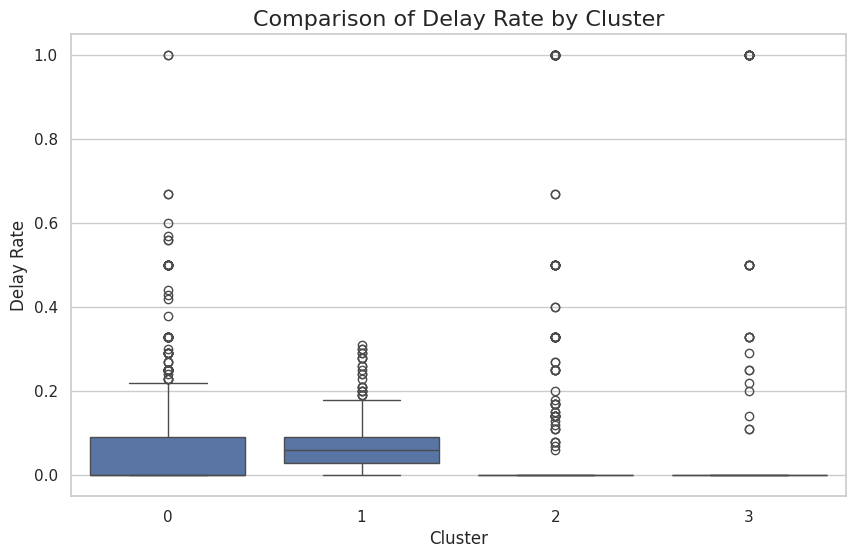

In [ ]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 클러스터별 지연율(delay_rate) 시각화
plt.figure(figsize=(10, 6))

# 기본 팔레트로 설정
sns.boxplot(x='cluster', y='delay_rate', data=cluster_df)

# 플롯 제목과 레이블 설정
plt.title('Comparison of Delay Rate by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Delay Rate', fontsize=12)

# 그래프 보여주기
plt.show()

# 클러스터 0은 지연율의 변동성이 크고, 높은 지연율을 기록한 판매자들이 존재합니다. 높은 지연율을 기록한 판매자들의 이상치가 많이 분포해있으며 배송시스템의 관리가 필요합니다.
# 클러스터 1도 비교적 비슷한 경향을 보이지만, 클러스터 0보다는 지연율이 덜 분산되어 있습니다. 어느정도 지연율 이상치를 가지지만 0.4의 지연율을 넘지 않는 것을 보아 체계적인 배송시스템이 운영되고 있다는 것을 알 수 있습니다.
# 클러스터 2와 3은 지연율이 매우 낮고 안정적인 판매자들이 속해 있습니다. 하지만 높은 지연율을 기록한 이상치들이 많아 배송시스템의 관리가 필요합니다.

#

박스플롯(Box Plot)에서 상자의 크기는 데이터의 **IQR(Interquartile Range, 사분위 범위)**을 나타냅니다.

IQR은 데이터의 중앙 50%를 포함하는 범위로, 1사분위(Q1, 하위 25%)와 3사분위(Q3, 상위 25%) 사이의 거리를 의미합니다.

즉, 상자의 아래쪽은 Q1, 위쪽은 Q3를 나타내며, 상자의 크기는 Q3에서 Q1을 뺀 값, 즉 IQR이 됩니다.

### 셀러 위치

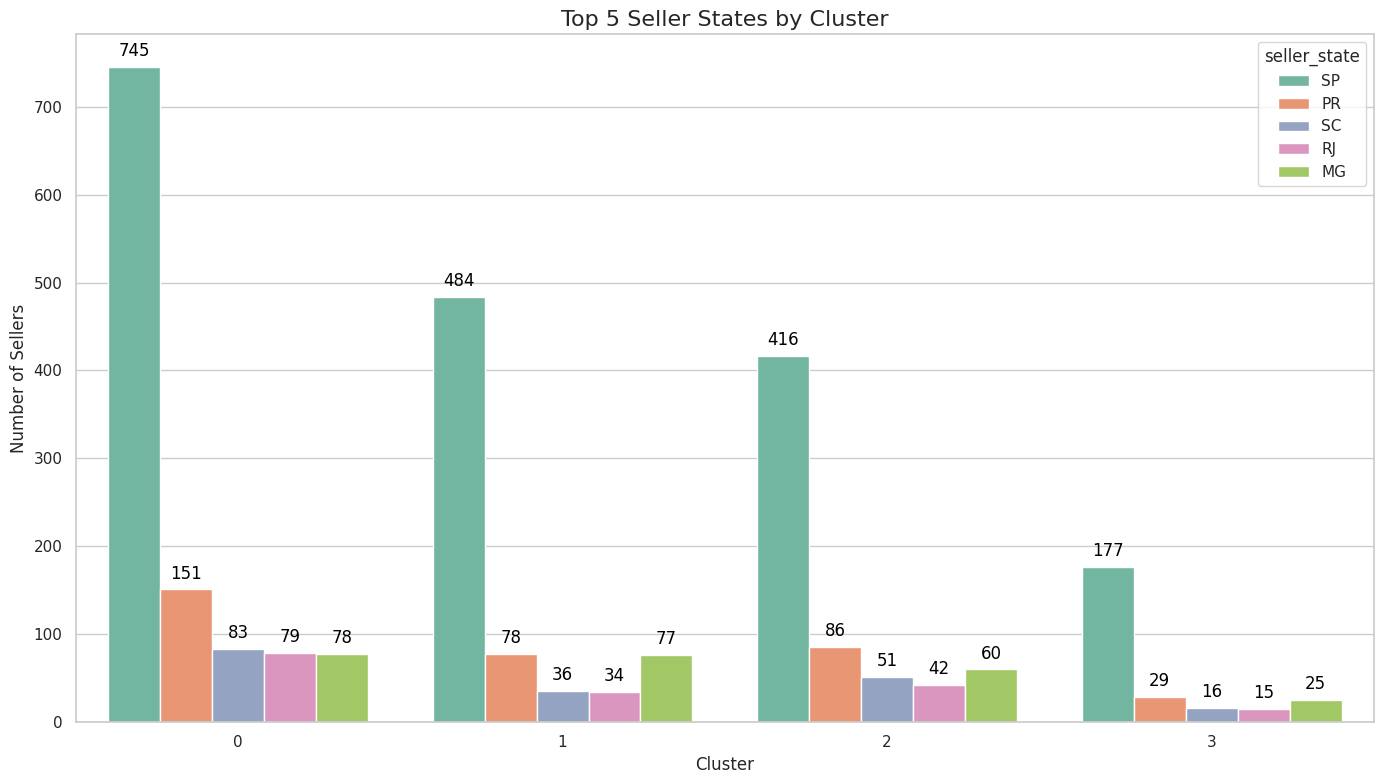

In [ ]:
# 클러스터와 판매자 state 정보 결합
clustered_seller_state = pd.merge(cluster_df[['seller_id', 'cluster']], sellers_df[['seller_id', 'seller_state']], on='seller_id', how='left')

# 클러스터별 판매자 state의 상위 5개 추출
seller_state_top5 = clustered_seller_state.groupby(['cluster', 'seller_state']).size().reset_index(name='count')
seller_state_top5 = seller_state_top5.groupby('cluster').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='cluster', y='count', hue='seller_state', data=seller_state_top5, palette='Set2')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
      bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('Top 5 Seller States by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 취소율

   cluster  total_orders  canceled_orders  cancel_rate
0        0         13244              119     0.898520
1        1         96443              294     0.304843
2        2          2090               57     2.727273
3        3           813               15     1.845018


<ipython-input-8-571866b1ff14>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='cluster', y='cancel_rate', data=cluster_summary, palette='Set2')


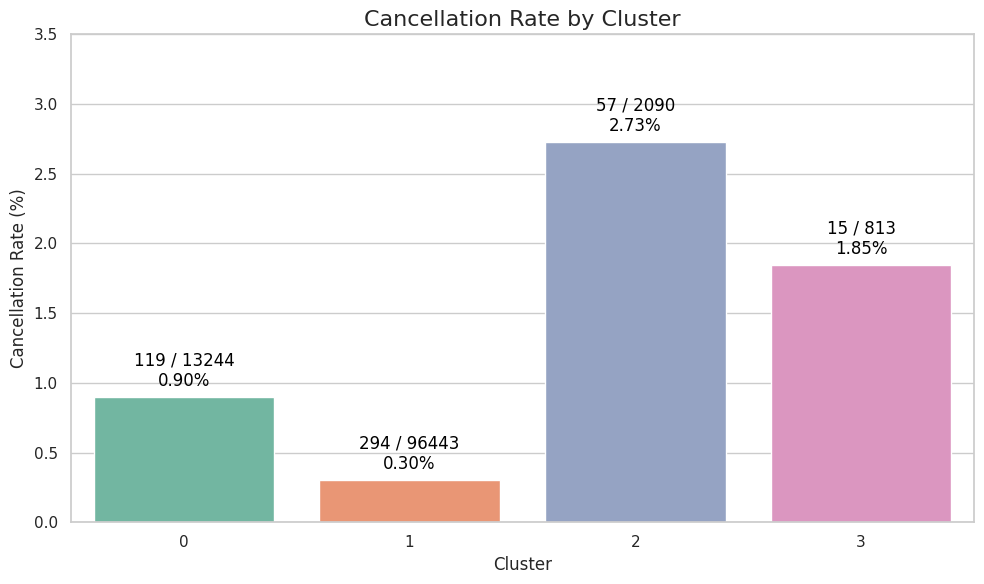

In [ ]:
# items_df와 orders_df를 order_id로 조인하여 판매자와 주문 상태 연결
order_status = pd.merge(items_df[['order_id', 'seller_id']],
                        orders_df[['order_id', 'order_status']],
                        on='order_id',
                        how='inner')

# order_status와 cluster_df를 seller_id로 조인하여 클러스터 정보 추가
clustered_orders = pd.merge(order_status, cluster_df[['seller_id', 'cluster']],
                            on='seller_id',
                            how='inner')

# 각 클러스터별 총 주문 수와 취소된 주문 수 계산
clustered_orders['is_canceled'] = clustered_orders['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
cluster_summary = clustered_orders.groupby('cluster').agg(
    total_orders=('order_id', 'size'),
    canceled_orders=('is_canceled', 'sum')
).reset_index()

# 클러스터별 취소율 계산
cluster_summary['cancel_rate'] = (cluster_summary['canceled_orders'] / cluster_summary['total_orders']) * 100

print(cluster_summary)

# 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cluster', y='cancel_rate', data=cluster_summary, palette='Set2')
plt.ylim(0, 3.5)

for index, row in cluster_summary.iterrows():
    bar_plot.annotate(f'{int(row["canceled_orders"])} / {int(row["total_orders"])}\n{row["cancel_rate"]:.2f}%',
                      (index, row['cancel_rate']),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('Cancellation Rate by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)

plt.tight_layout()
plt.show()

### 평균 배송시간

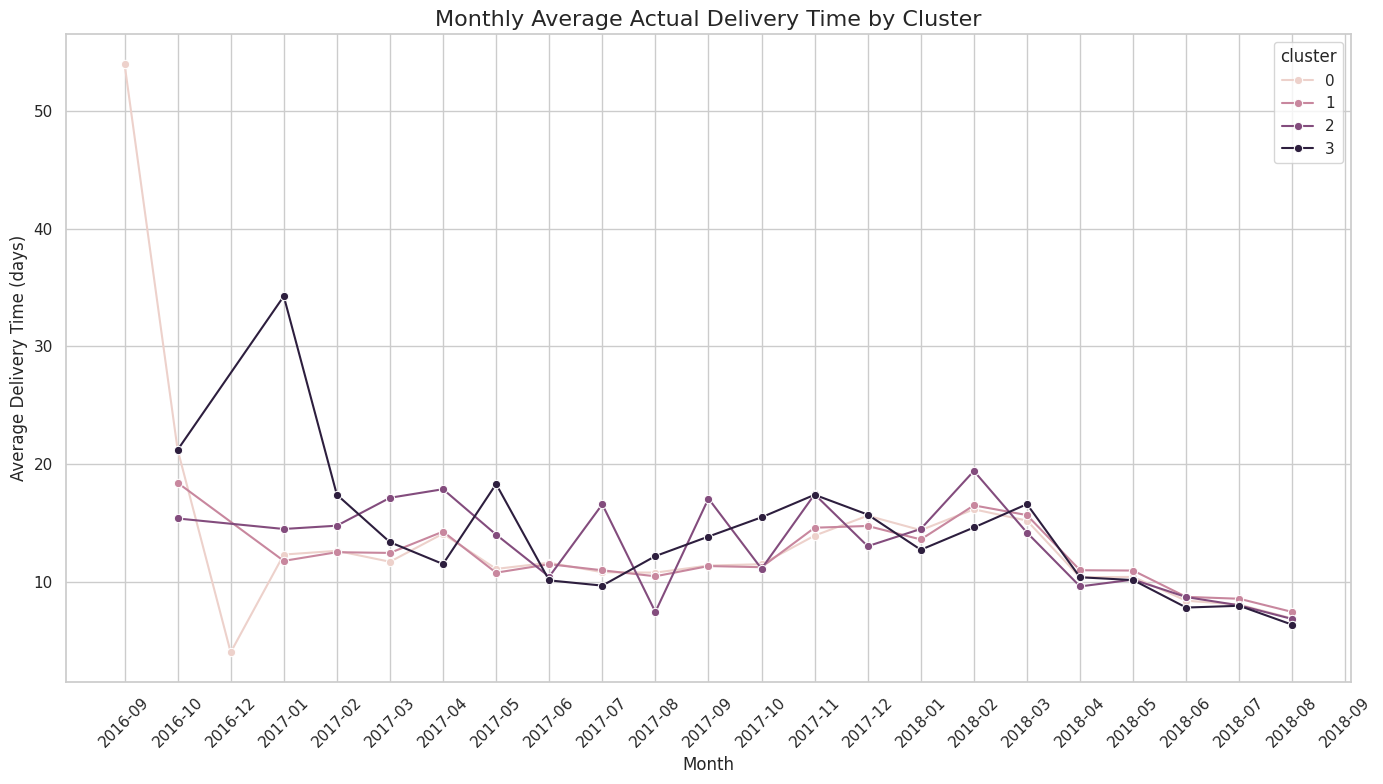

In [ ]:
# 주문 시간 및 실제 배송 날짜를 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# 실제 배송 시간 계산 (실제 배송 날짜 - 주문 시간)
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# 주문과 판매자 연결 (items_df와 orders_df를 order_id로 조인)
order_delivery = pd.merge(items_df[['order_id', 'seller_id']],
                          orders_df[['order_id', 'delivery_time', 'order_purchase_timestamp']],
                          on='order_id',
                          how='inner')

# 주문 시간에서 연도와 월 추출 (문자열로 변환)
order_delivery['year_month'] = order_delivery['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 클러스터 정보 추가
order_delivery_clustered = pd.merge(order_delivery, cluster_df[['seller_id', 'cluster']],
                                    on='seller_id',
                                    how='inner')

# 클러스터별 및 월별 평균 실제 배송 시간 계산
monthly_avg_delivery_time = order_delivery_clustered.groupby(['year_month', 'cluster'])['delivery_time'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_month', y='delivery_time', hue='cluster', data=monthly_avg_delivery_time, marker='o')

plt.title('Monthly Average Actual Delivery Time by Cluster', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 배송지

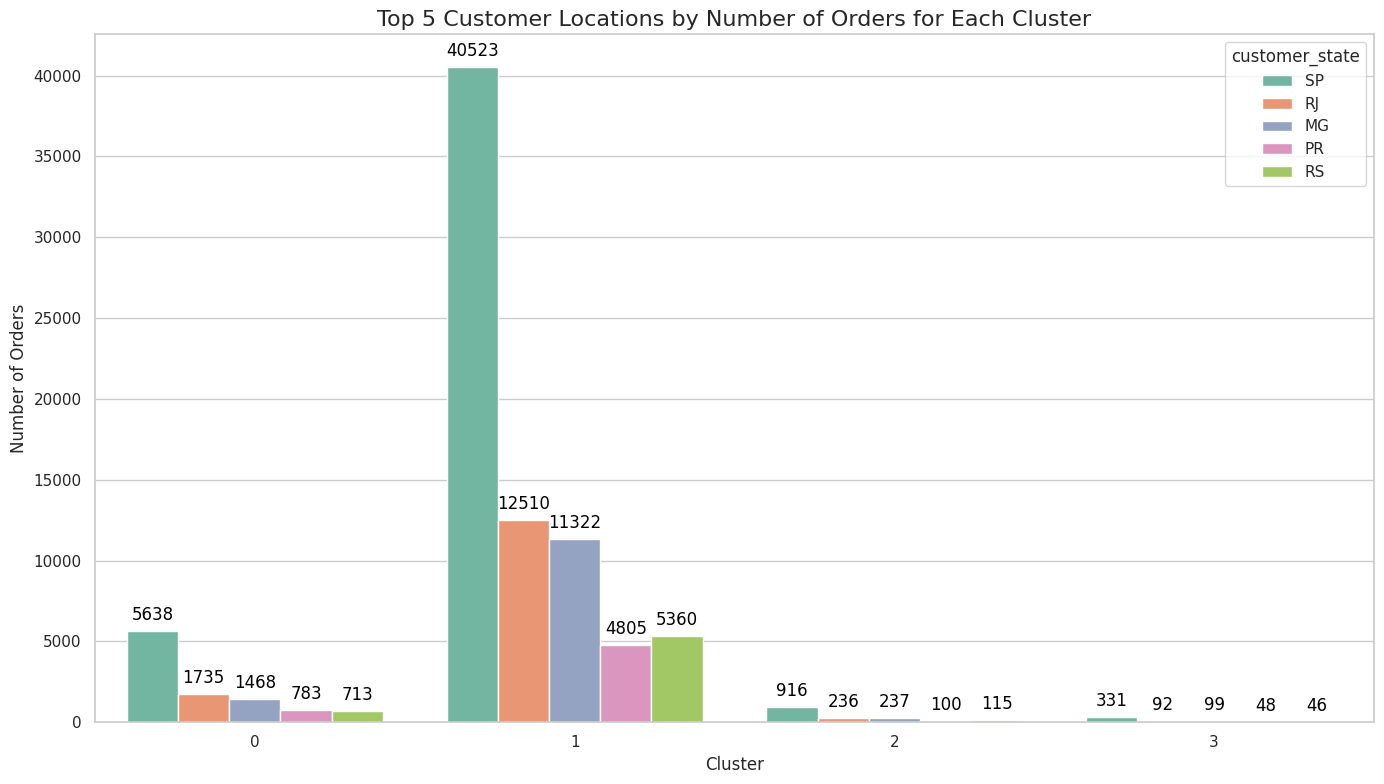

In [ ]:
# items_df와 orders_df를 order_id로 조인하여 주문 및 판매자 정보 연결
order_customer = pd.merge(items_df[['order_id', 'seller_id']],
                          orders_df[['order_id', 'customer_id']],
                          on='order_id',
                          how='inner')

# order_customer와 customers_df를 customer_id로 조인하여 소비자의 위치 정보 연결
order_customer_location = pd.merge(order_customer,
                                   customers_df[['customer_id', 'customer_state']],
                                   on='customer_id',
                                   how='inner')

# order_customer_location과 cluster_df를 seller_id로 조인하여 클러스터 정보 추가
clustered_orders = pd.merge(order_customer_location,
                            cluster_df[['seller_id', 'cluster']],
                            on='seller_id',
                            how='inner')

# 클러스터별, 소비자 위치별 주문 건수 계산
location_order_counts = clustered_orders.groupby(['cluster', 'customer_state']).size().reset_index(name='order_count')

# 클러스터별 Top 5 소비자 위치(주별) 추출
top5_locations_orders = location_order_counts.groupby('cluster').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)

# 시각화
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='cluster', y='order_count', hue='customer_state', data=top5_locations_orders, palette='Set2')
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
      bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('Top 5 Customer Locations by Number of Orders for Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.tight_layout()
plt.show()

## 결제 유형

### 결제 유형(바 차트)



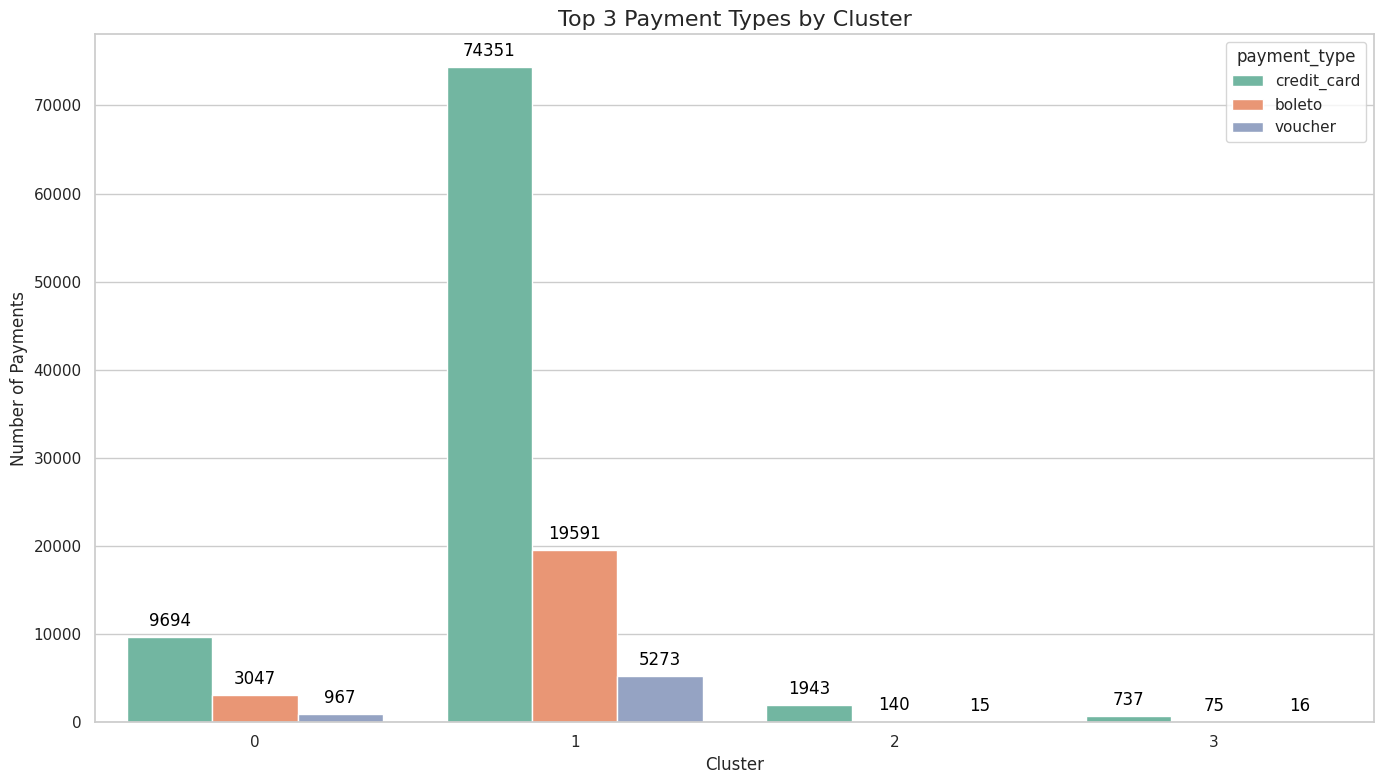

In [ ]:
# items_df와 payments_df를 order_id로 조인하여 판매자와 결제 정보 연결
order_payments = pd.merge(items_df[['order_id', 'seller_id']],
                          payments_df[['order_id', 'payment_type']],
                          on='order_id',
                          how='inner')

# order_payments와 cluster_df를 seller_id로 조인하여 클러스터 정보 추가
clustered_payments = pd.merge(order_payments, cluster_df[['seller_id', 'cluster']],
                              on='seller_id',
                              how='inner')

# 클러스터별 결제 유형 집계
payment_type_top3 = clustered_payments.groupby(['cluster', 'payment_type']).size().reset_index(name='count')
payment_type_top3 = payment_type_top3.groupby('cluster').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# 시각화
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='cluster', y='count', hue='payment_type', data=payment_type_top3, palette='Set2')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
      bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('Top 3 Payment Types by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Payments', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 결제 타입(파이차트)

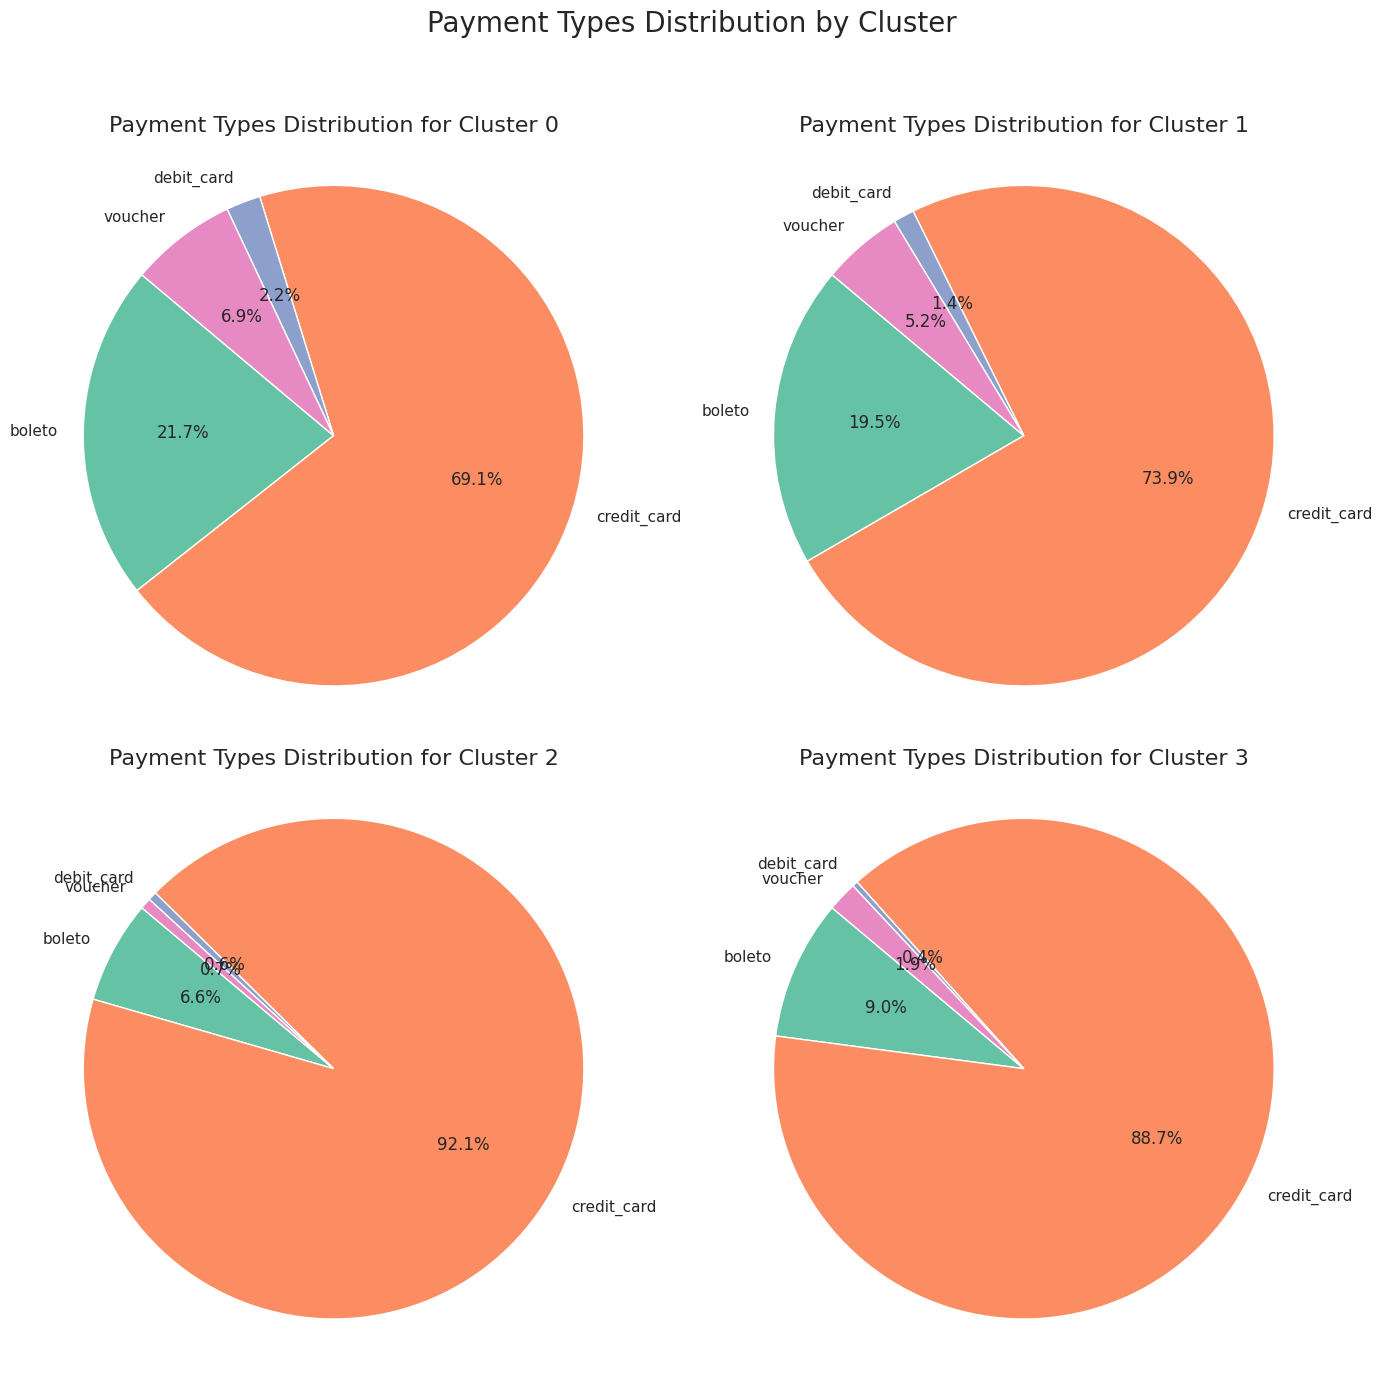

In [ ]:
# 클러스터별 파이 차트 생성
clusters = payment_type_counts['cluster'].unique()

plt.figure(figsize=(14, 14))

for i, cluster in enumerate(clusters):
    plt.subplot(2, 2, i + 1)
    cluster_data = payment_type_counts[payment_type_counts['cluster'] == cluster]

    labels = cluster_data['payment_type']
    sizes = cluster_data['count']

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Payment Types Distribution for Cluster {cluster}', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Payment Types Distribution by Cluster', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 카테고리

### 카테고리 종류

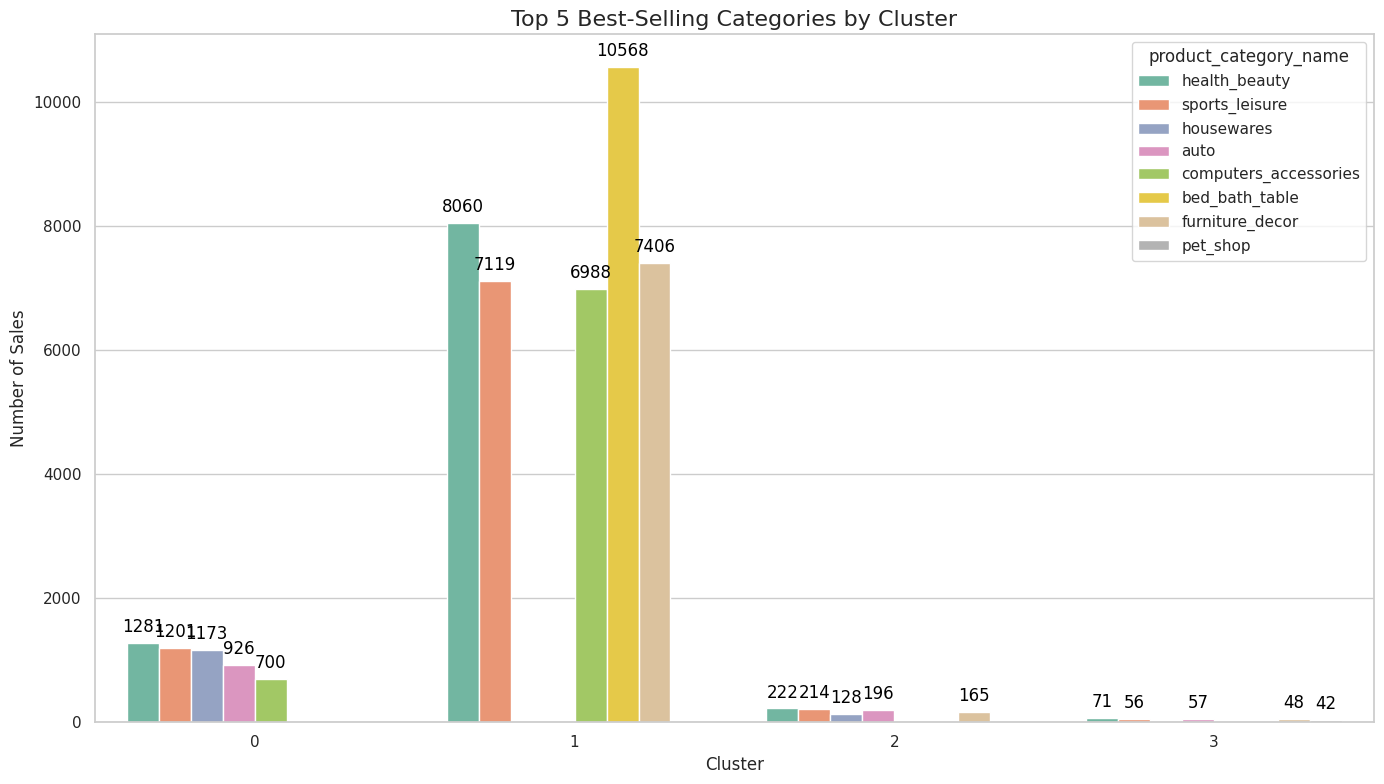

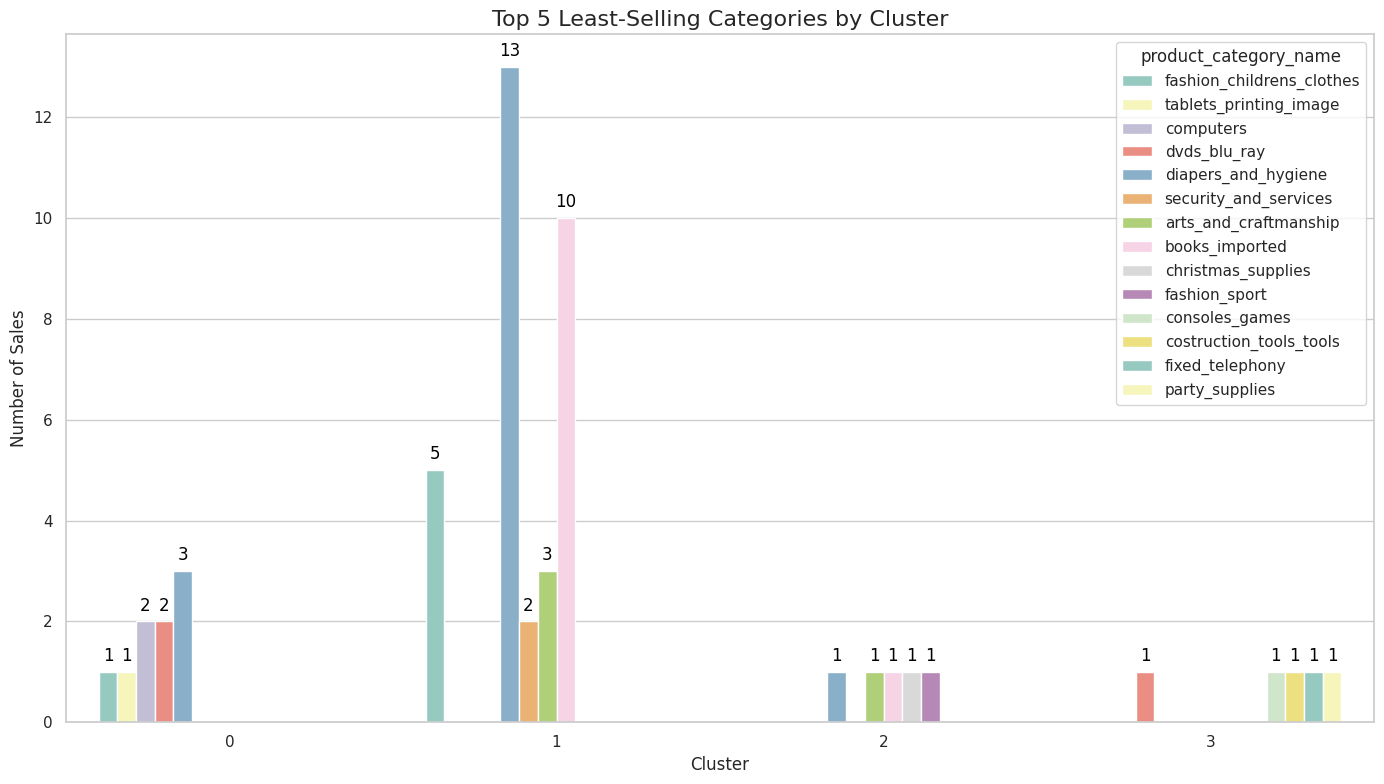

In [ ]:
# merged_df와 cluster_df를 seller_id로 조인하여 클러스터 정보 추가
clustered_categories = pd.merge(merged_df[['seller_id', 'product_category_name']],
                                cluster_df[['seller_id', 'cluster']],
                                on='seller_id',
                                how='inner')

# 클러스터별 카테고리 판매량 집계
category_sales = clustered_categories.groupby(['cluster', 'product_category_name']).size().reset_index(name='count')

# 클러스터별 Top 5 잘팔리는 카테고리 추출
top5_categories = category_sales.groupby('cluster').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# 클러스터별 Bottom 5 안팔리는 카테고리 추출
bottom5_categories = category_sales.groupby('cluster').apply(lambda x: x.nsmallest(5, 'count')).reset_index(drop=True)

# 시각화 (잘 팔리는 카테고리)
plt.figure(figsize=(14, 8))
bar_plot_top = sns.barplot(x='cluster', y='count', hue='product_category_name', data=top5_categories, palette='Set2')

for p in bar_plot_top.patches:
    height = p.get_height()
    if height > 0:
      bar_plot_top.annotate(f'{int(height)}',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom',
                          fontsize=12, color='black', xytext=(0, 5),
                          textcoords='offset points')

plt.title('Top 5 Best-Selling Categories by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 시각화 (안 팔리는 카테고리)
plt.figure(figsize=(14, 8))
bar_plot_bottom = sns.barplot(x='cluster', y='count', hue='product_category_name', data=bottom5_categories, palette='Set3')

for p in bar_plot_bottom.patches:
    height = p.get_height()
    if height > 0:
      bar_plot_bottom.annotate(f'{int(height)}',
                             (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='bottom',
                             fontsize=12, color='black', xytext=(0, 5),
                             textcoords='offset points')

plt.title('Top 5 Least-Selling Categories by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 카테고리 개수

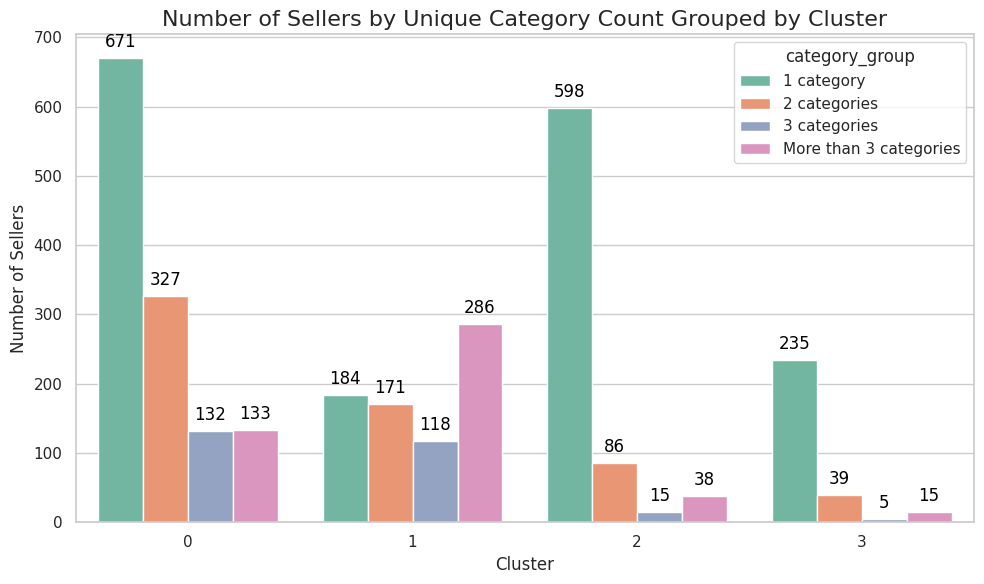

In [ ]:
# 카테고리 개수에 따른 그룹핑
def category_grouping(count):
    if count == 1:
        return '1 category'
    elif count == 2:
        return '2 categories'
    elif count == 3:
        return '3 categories'
    else:
        return 'More than 3 categories'

# 카테고리 개수를 그룹화
cluster_df['category_group'] = cluster_df['unique_category_count'].apply(category_grouping)

# 클러스터별, 카테고리 그룹별 카운트 계산
category_count_by_cluster = cluster_df.groupby(['cluster', 'category_group']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cluster', y='count', hue='category_group', data=category_count_by_cluster, palette='Set2')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
        bar_plot.annotate(f'{int(height)}',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom',
                          fontsize=12, color='black', xytext=(0, 5),
                          textcoords='offset points')

plt.title('Number of Sellers by Unique Category Count Grouped by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)

plt.tight_layout()
plt.show()

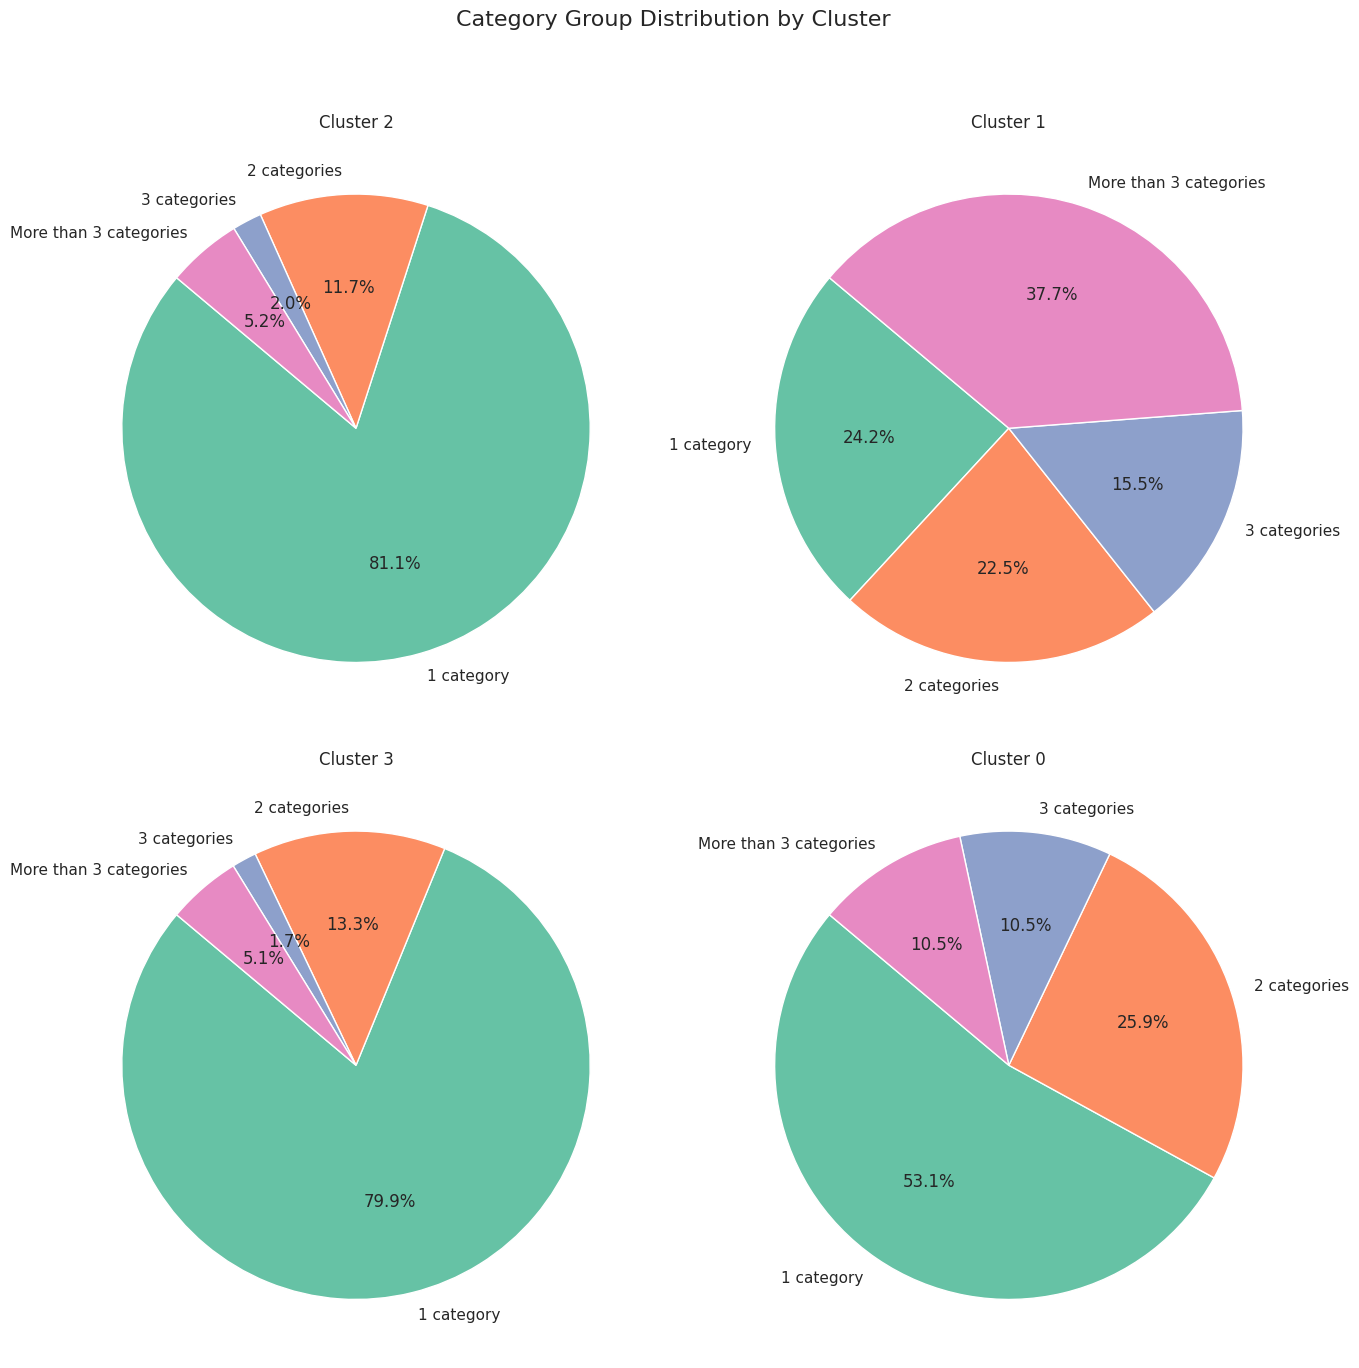

In [ ]:
# 클러스터별 카테고리 그룹 비율 파이차트 생성
clusters = cluster_df['cluster'].unique()

plt.figure(figsize=(14, 14))

# 클러스터별로 파이 차트 생성
for i, cluster in enumerate(clusters):
    plt.subplot(2, 2, i + 1)  # 2x2 subplot grid에서 차트 배치
    cluster_data = category_count_by_cluster[category_count_by_cluster['cluster'] == cluster]

    # 파이차트 생성
    plt.pie(cluster_data['count'], labels=cluster_data['category_group'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Cluster {cluster}')

# 전체 타이틀
plt.suptitle('Category Group Distribution by Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 카테고리 개수별 매출

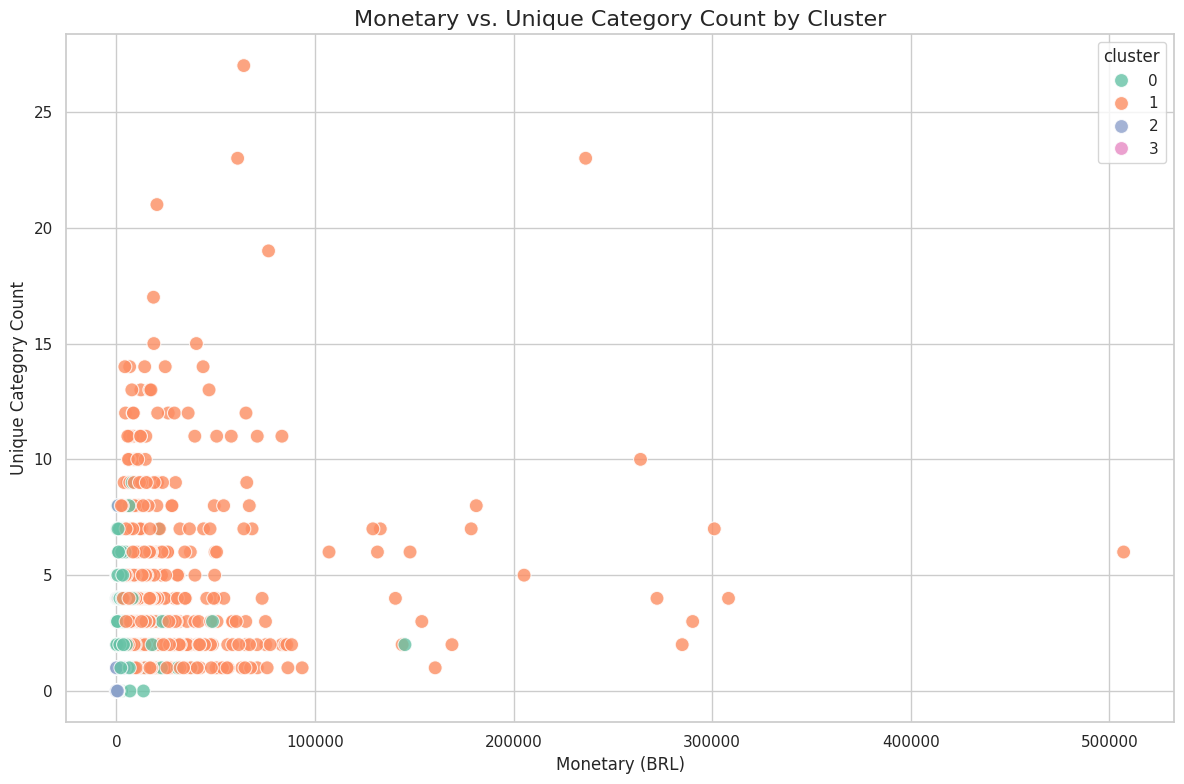

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='monetary', y='unique_category_count', hue='cluster', data=cluster_df, palette='Set2', s=100, edgecolor='w', alpha=0.8)

plt.title('Monetary vs. Unique Category Count by Cluster', fontsize=16)
plt.xlabel('Monetary (BRL)', fontsize=12)
plt.ylabel('Unique Category Count', fontsize=12)

plt.tight_layout()
plt.show()

## 리뷰

### 평균 리뷰 평점

   cluster  avg_review_score
0        0          4.048036
1        1          4.058538
2        2          3.870027
3        3          3.999558


<ipython-input-16-b37dc0f8d063>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='cluster', y='avg_review_score', data=cluster_avg_review, palette='Set2')


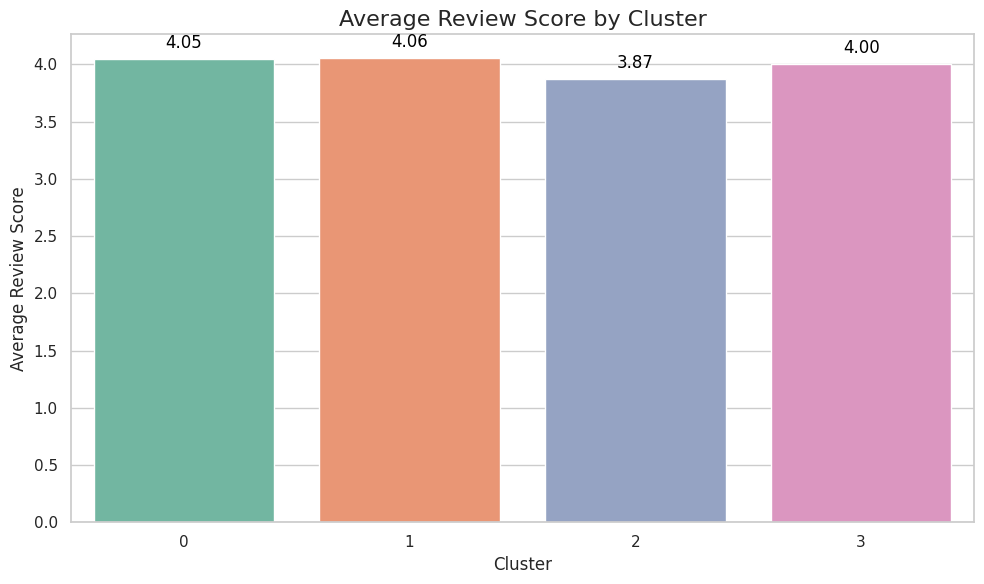

In [ ]:
# 클러스터별 평균 리뷰 평점 계산
cluster_avg_review = cluster_df.groupby('cluster')['avg_review_score'].mean().reset_index()
print(cluster_avg_review)

# 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cluster', y='avg_review_score', data=cluster_avg_review, palette='Set2')

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('Average Review Score by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)

plt.tight_layout()
plt.show()

### 월별 평균 리뷰 평점

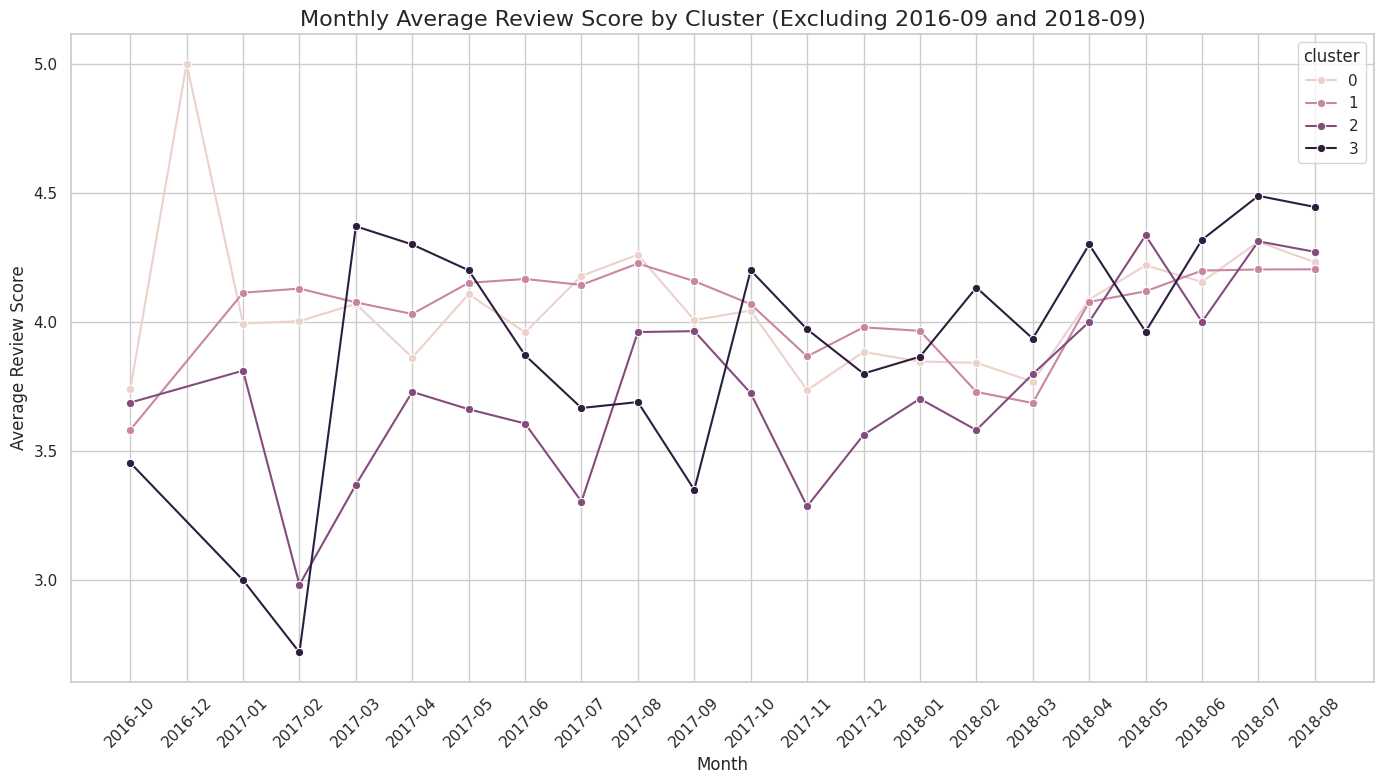

In [ ]:
# 주문 시간 정보를 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 주문과 리뷰를 order_id로 조인
order_reviews = pd.merge(items_df[['order_id', 'seller_id']],
                         reviews_df[['order_id', 'review_score']],
                         on='order_id',
                         how='inner')

# 주문과 주문 시간을 조인
order_reviews_time = pd.merge(order_reviews,
                              orders_df[['order_id', 'order_purchase_timestamp']],
                              on='order_id',
                              how='inner')

# 주문 시간에서 연도와 월 추출 (문자열로 변환)
order_reviews_time['year_month'] = order_reviews_time['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 2016년 9월과 2018년 9월 데이터를 제외
order_reviews_time = order_reviews_time[~order_reviews_time['year_month'].isin(['2016-09', '2018-09'])]

# 클러스터 정보 추가
order_reviews_clustered = pd.merge(order_reviews_time,
                                   cluster_df[['seller_id', 'cluster']],
                                   on='seller_id',
                                   how='inner')

# 클러스터별 및 월별 평균 리뷰 평점 계산
monthly_avg_reviews = order_reviews_clustered.groupby(['year_month', 'cluster'])['review_score'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x='year_month', y='review_score', hue='cluster', data=monthly_avg_reviews, marker='o')

plt.title('Monthly Average Review Score by Cluster (Excluding 2016-09 and 2018-09)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 낮은 리뷰 평점

   cluster  total_reviews  low_score_reviews  low_score_percentage
0        0          13202               2118             16.043024
1        1          96225              15375             15.978176
2        2           2082                436             20.941402
3        3            803                128             15.940224


<ipython-input-29-8e97e7f42bc3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='cluster', y='low_score_percentage', data=review_stats, palette='Set2')


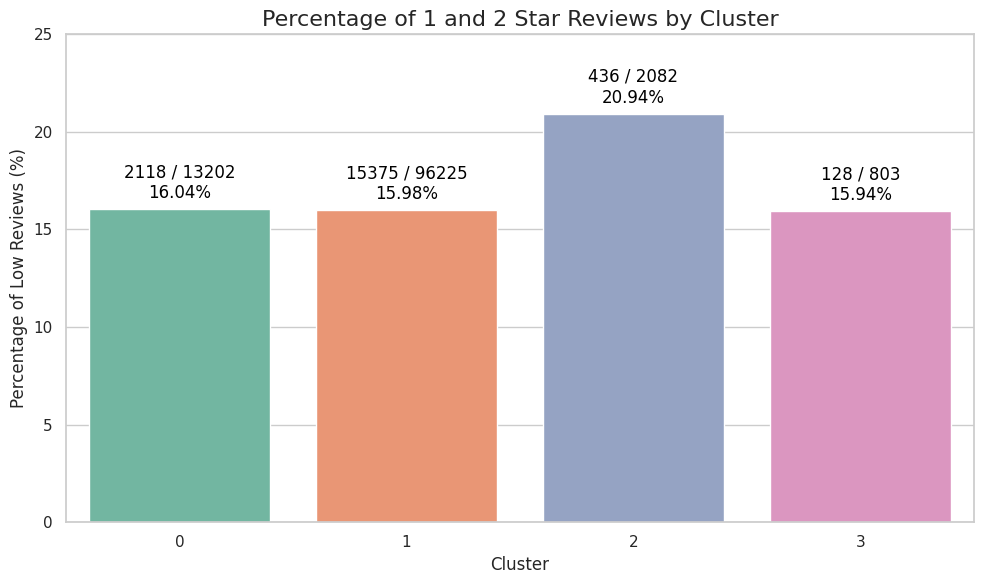

In [ ]:
# 조인: items_df와 reviews_df를 order_id로 조인하여 리뷰와 판매자 연결
order_reviews = pd.merge(items_df[['order_id', 'seller_id']],
                         reviews_df[['order_id', 'review_score']],
                         on='order_id',
                         how='inner')

# 조인: order_reviews와 cluster_df를 seller_id로 조인하여 클러스터 정보 추가
clustered_reviews = pd.merge(order_reviews,
                             cluster_df[['seller_id', 'cluster']],
                             on='seller_id',
                             how='inner')

# 클러스터별 전체 리뷰 개수 계산
total_reviews_per_cluster = clustered_reviews.groupby('cluster').size().reset_index(name='total_reviews')

# 1점 또는 2점 리뷰 필터링
low_score_reviews = clustered_reviews[clustered_reviews['review_score'].isin([1, 2])]

# 클러스터별 1점, 2점 리뷰 개수 계산
low_score_count_per_cluster = low_score_reviews.groupby('cluster').size().reset_index(name='low_score_reviews')

# 클러스터별 1, 2점 리뷰 비율 계산
review_stats = pd.merge(total_reviews_per_cluster, low_score_count_per_cluster, on='cluster', how='left').fillna(0)
review_stats['low_score_percentage'] = (review_stats['low_score_reviews'] / review_stats['total_reviews']) * 100

# 결과 출력
print(review_stats)

# 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cluster', y='low_score_percentage', data=review_stats, palette='Set2')

# 막대 위에 수치 표시 (총 리뷰 개수 / 낮은 리뷰 개수와 비율)
for p in bar_plot.patches:
    height = p.get_height()
    cluster_index = int(p.get_x() + p.get_width() / 2.)
    total_reviews = int(review_stats.iloc[cluster_index]['total_reviews'])
    low_reviews = int(review_stats.iloc[cluster_index]['low_score_reviews'])
    bar_plot.annotate(f'{low_reviews} / {total_reviews}\n{height:.2f}%',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Y축 범위 설정
plt.ylim(0, 25.0)

# 플롯 제목과 레이블 설정
plt.title('Percentage of 1 and 2 Star Reviews by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage of Low Reviews (%)', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

# 클러스터 2는 1점 및 2점 리뷰의 비율이 약 21%에 달하며, 고객의 불만이 가장 많이 나타나는 클러스터입니다. 이 클러스터의 고객 만족도를 높이기 위해 추가적인 분석과 조치가 필요할 수 있습니다.
# 클러스터 0, 1, 3은 낮은 리뷰의 비율이 모두 약 16% 내외로 비슷한 수준을 보입니다. 이들 클러스터도 여전히 1점 및 2점 리뷰가 적지 않기 때문에, 만족도 개선을 위한 노력이 필요합니다.

### 월별 낮은 리뷰 평점

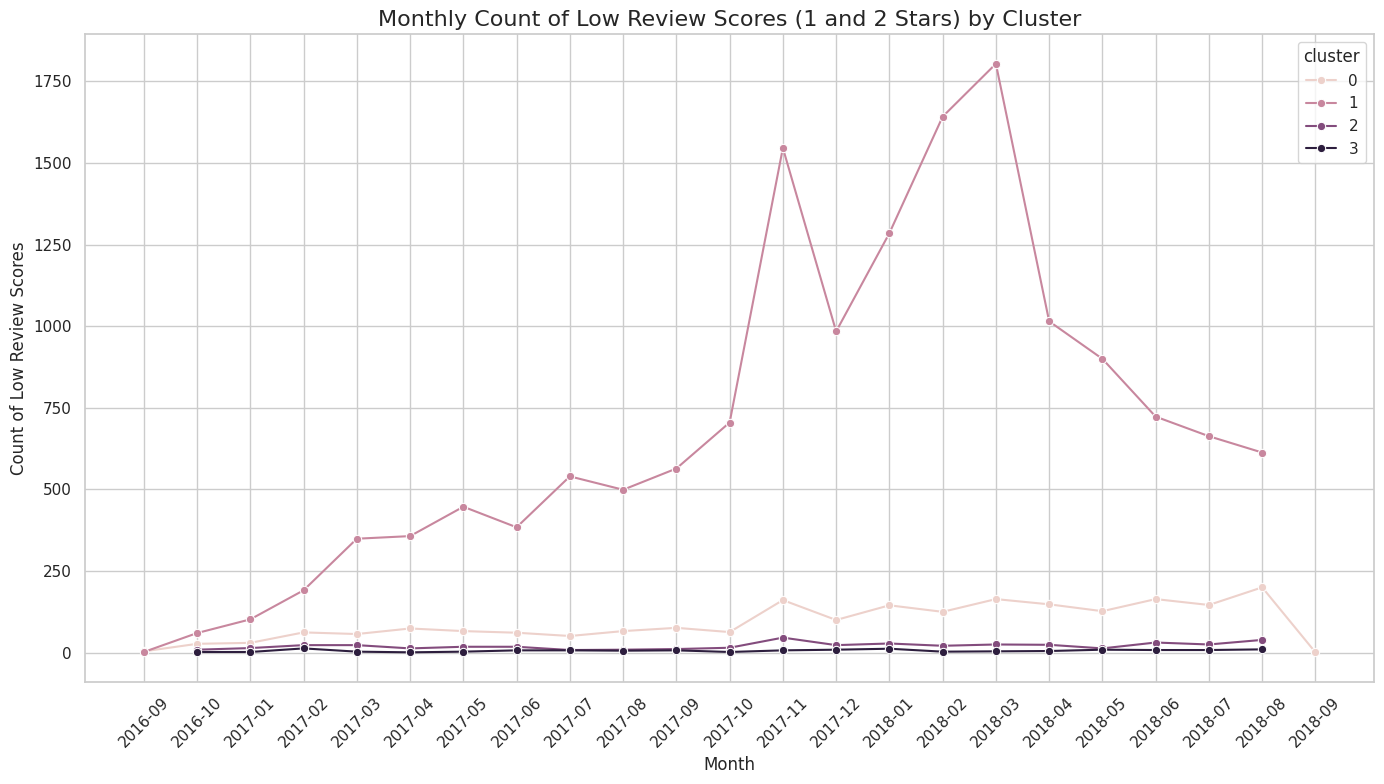

In [ ]:
# 주문 시간 정보를 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 주문과 리뷰를 order_id로 조인
order_reviews = pd.merge(items_df[['order_id', 'seller_id']],
                         reviews_df[['order_id', 'review_score']],
                         on='order_id',
                         how='inner')

# 주문 시간 추가 (order_id로 주문 시간 연결)
order_reviews_time = pd.merge(order_reviews,
                              orders_df[['order_id', 'order_purchase_timestamp']],
                              on='order_id',
                              how='inner')

# 주문 시간에서 연도와 월 추출 (문자열로 변환)
order_reviews_time['year_month'] = order_reviews_time['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 클러스터 정보 추가 (seller_id로 클러스터 정보 연결)
order_reviews_clustered = pd.merge(order_reviews_time,
                                   cluster_df[['seller_id', 'cluster']],
                                   on='seller_id',
                                   how='inner')

# 1점 또는 2점 리뷰만 필터링
low_score_reviews = order_reviews_clustered[order_reviews_clustered['review_score'].isin([1, 2])]

# 월별 및 클러스터별 낮은 리뷰 개수 계산
monthly_low_score_reviews = low_score_reviews.groupby(['year_month', 'cluster']).size().reset_index(name='low_score_count')

# 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x='year_month', y='low_score_count', hue='cluster', data=monthly_low_score_reviews, marker='o')

plt.title('Monthly Count of Low Review Scores (1 and 2 Stars) by Cluster', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Low Review Scores', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 워드클라우드(4시간 이상 걸려서 주석 처리)

In [ ]:
# pip install googletrans==4.0.0-rc1 wordcloud

In [ ]:
# # 필요한 라이브러리 불러오기
# import pandas as pd
# from googletrans import Translator
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter

# # Google Translator 설정
# translator = Translator()

# # 리뷰 코멘트와 클러스터 정보 연결
# order_reviews = pd.merge(items_df[['order_id', 'seller_id']],
#                          reviews_df[['order_id', 'review_comment_message']],
#                          on='order_id',
#                          how='inner')
# order_reviews_clustered = pd.merge(order_reviews,
#                                    cluster_df[['seller_id', 'cluster']],
#                                    on='seller_id',
#                                    how='inner')

# # 클러스터별로 데이터 처리
# for cluster in order_reviews_clustered['cluster'].unique():
#     # 해당 클러스터의 리뷰 코멘트 추출
#     cluster_comments = order_reviews_clustered[order_reviews_clustered['cluster'] == cluster]['review_comment_message'].dropna()

#     # 포르투갈어 -> 영어 번역 (일부 코멘트만 번역하여 예시를 제공)
#     translated_comments = []
#     for comment in cluster_comments:
#         try:
#             translation = translator.translate(comment, src='pt', dest='en')
#             translated_comments.append(translation.text)
#         except Exception as e:
#             print(f"Translation error: {e}")

#     # 워드클라우드를 만들기 위한 텍스트 결합
#     all_text = ' '.join(translated_comments)

#     # 워드클라우드 생성
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#     # 워드클라우드 시각화
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Word Cloud for Cluster {cluster}', fontsize=16)
#     plt.axis('off')
#     plt.show()

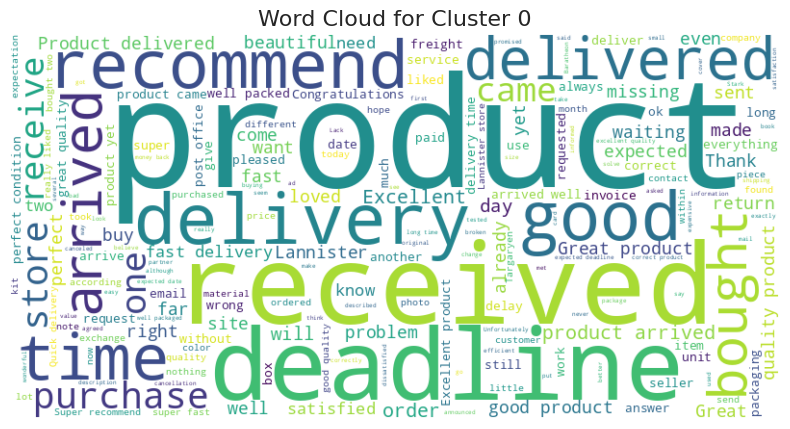

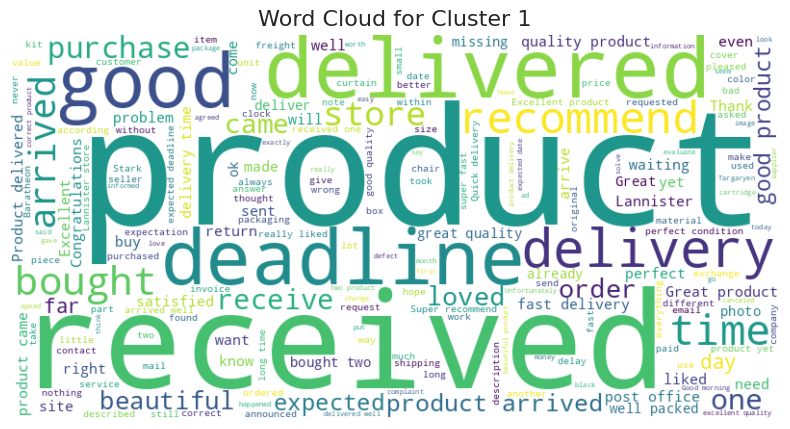

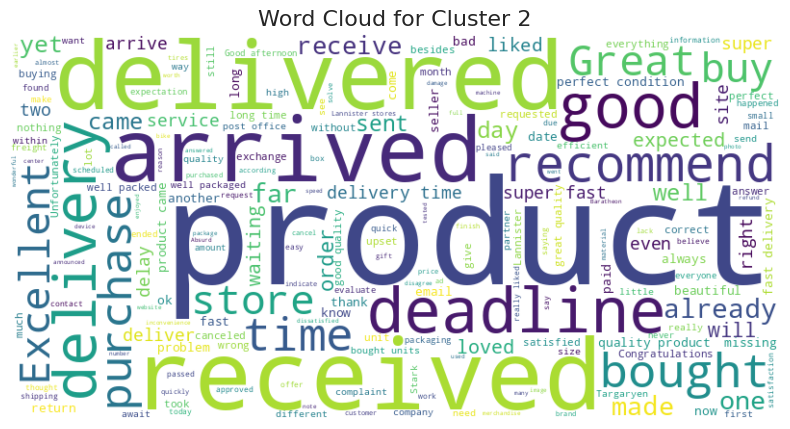

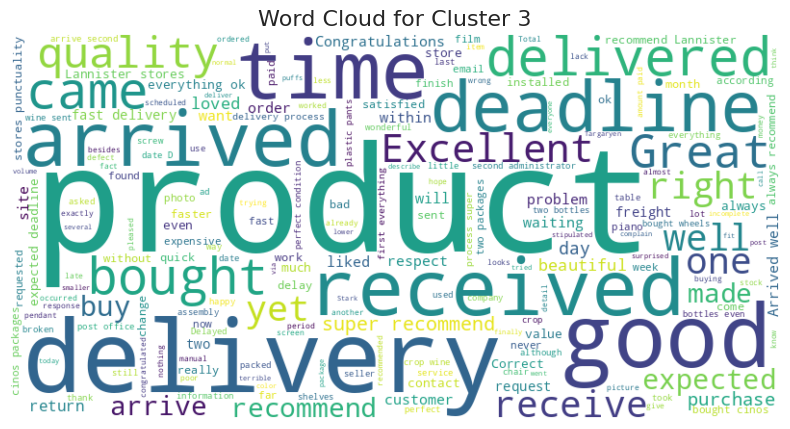

클러스터 0

주요 단어: product, received, delivered, recommend, deadline, time, purchase, arrived, good.

해석: 클러스터 0의 리뷰에서 가장 자주 언급된 단어는 product(제품), received(받음), delivered(배송됨)입니다. 이 단어들은 제품이 제때 배송되었는지, 제품의 품질이 좋았는지에 대한 고객의 의견을 나타냅니다. recommend(추천)이라는 단어도 크게 표시되어 있어, 이 클러스터에 속한 판매자들은 고객들에게 좋은 평가를 받고 있다는 것을 알 수 있습니다.

---

클러스터 1

주요 단어: product, received, delivered, recommend, deadline, good, arrived, purchase, time.

해석: 클러스터 1에서도 product, received, delivered와 같은 단어들이 두드러지게 나타나고 있습니다. 이 역시 배송과 제품의 품질에 대한 고객의 관심을 반영합니다. recommend와 같은 긍정적인 피드백이 강하게 나타나고 있어, 이 클러스터의 고객들도 대체로 만족하는 것으로 보입니다.

---

클러스터 2

주요 단어: product, delivered, received, deadline, arrived, good, recommend, purchase, delivery.

해석: 클러스터 2의 리뷰에서도 제품과 배송 관련 단어들이 중심에 있습니다. 특히 deadline(기한)이라는 단어가 크게 나타나 있어, 고객들이 배송 기한에 민감하게 반응했음을 알 수 있습니다. recommend와 good이라는 단어들도 나타나, 이 클러스터 역시 긍정적인 평가가 많음을 나타냅니다.

---

클러스터 3

주요 단어: product, delivery, received, time, arrived, deadline, good, recommend, purchase.

해석: 클러스터 3에서도 비슷한 패턴을 보입니다. product, delivery, received 같은 단어들이 강조되고 있으며, time(시간)과 deadline(기한)에 대한 언급이 많습니다. 이는 배송 시간과 관련된 고객의 경험이 이 클러스터에서 중요한 요소임을 보여줍니다.



## 매출/주문량

### 월별 매출

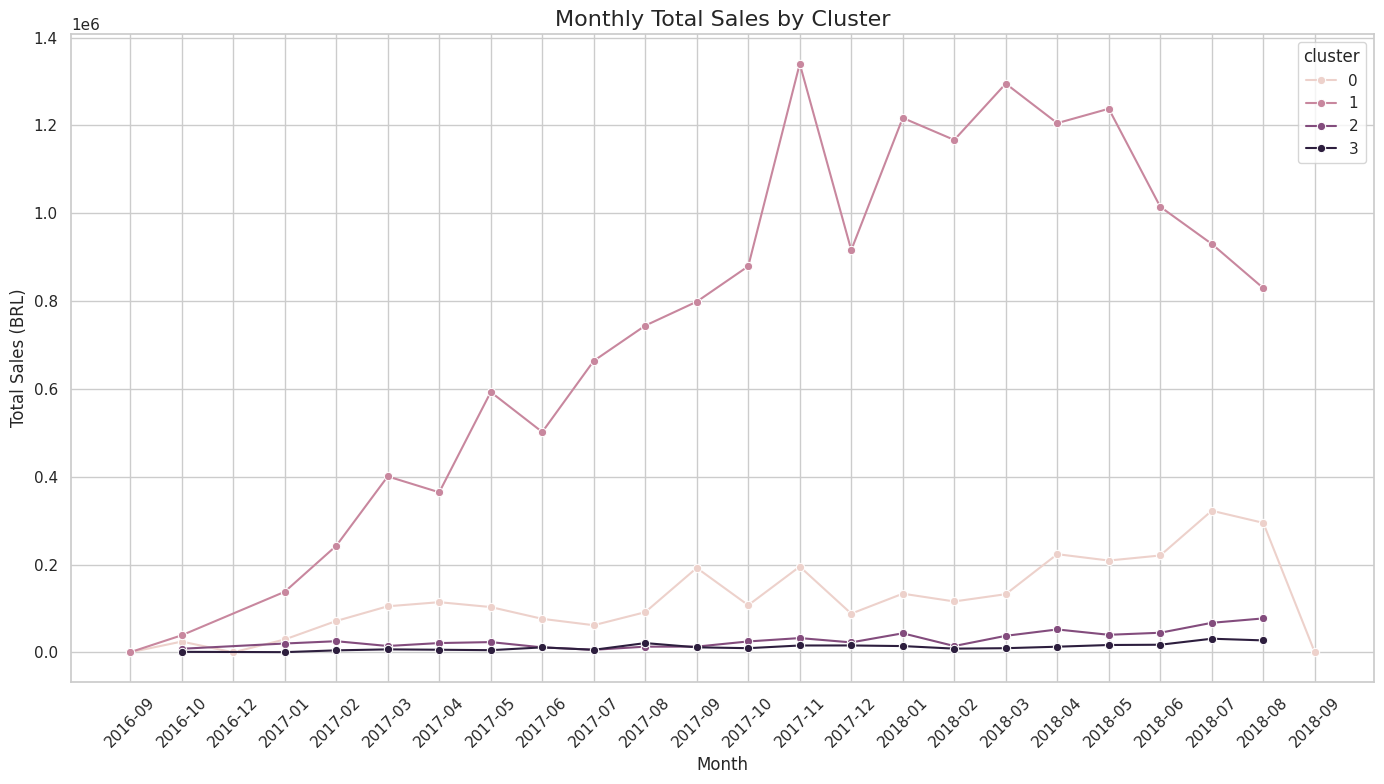

In [ ]:
# 주문 시간 정보를 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 주문과 결제 정보를 order_id로 조인하여 매출 정보 연결
order_payments = pd.merge(items_df[['order_id', 'seller_id']],
                          payments_df[['order_id', 'payment_value']],
                          on='order_id',
                          how='inner')

# 주문 시간 추가 (order_id로 주문 시간 연결)
order_payments_time = pd.merge(order_payments,
                               orders_df[['order_id', 'order_purchase_timestamp']],
                               on='order_id',
                               how='inner')

# 주문 시간에서 연도와 월 추출 (문자열로 변환)
order_payments_time['year_month'] = order_payments_time['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 클러스터 정보 추가 (seller_id로 클러스터 정보 연결)
order_payments_clustered = pd.merge(order_payments_time,
                                    cluster_df[['seller_id', 'cluster']],
                                    on='seller_id',
                                    how='inner')

# 월별 및 클러스터별 총 매출 계산
monthly_sales = order_payments_clustered.groupby(['year_month', 'cluster'])['payment_value'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x='year_month', y='payment_value', hue='cluster', data=monthly_sales, marker='o')

plt.title('Monthly Total Sales by Cluster', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (BRL)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 월별 주문량

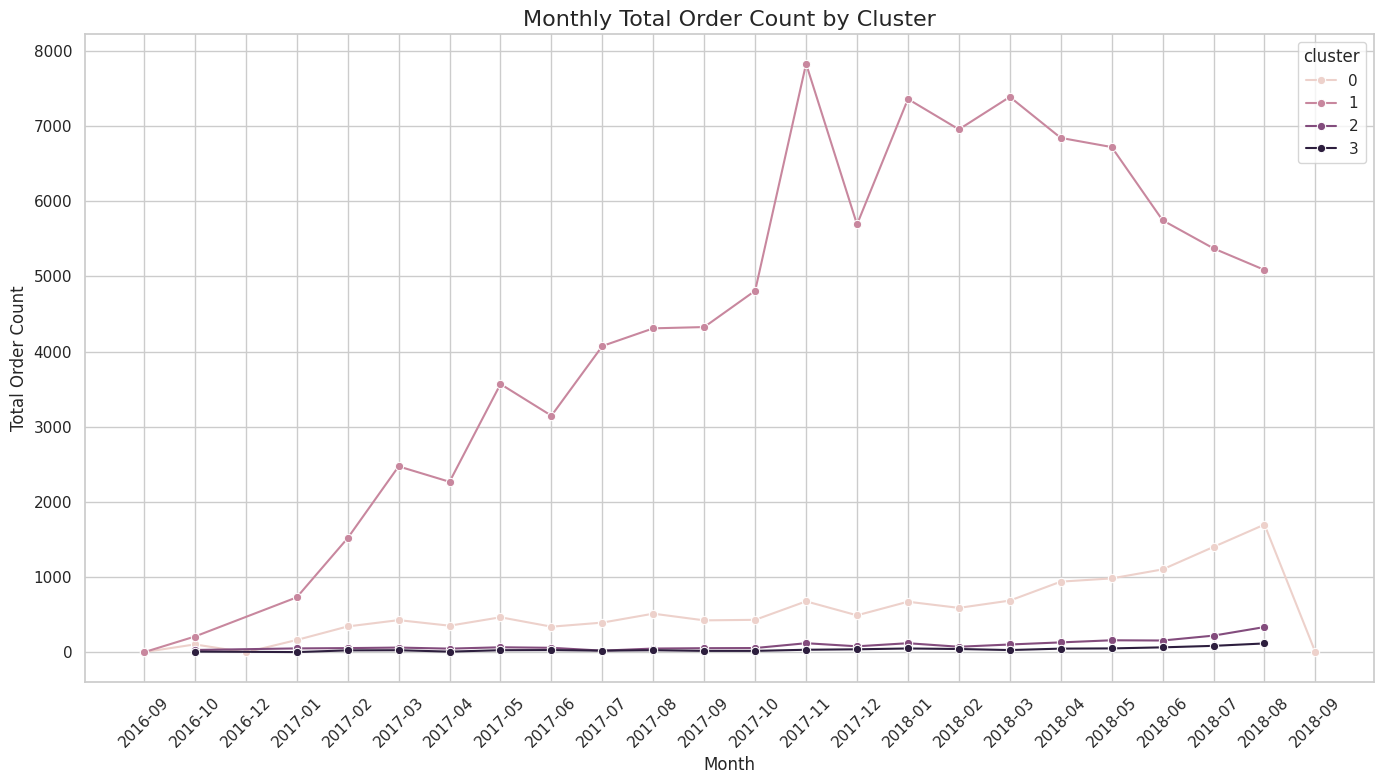

In [ ]:
# 주문 시간 정보를 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 주문과 판매자 연결 (items_df와 orders_df를 order_id로 조인)
order_info = pd.merge(items_df[['order_id', 'seller_id']],
                      orders_df[['order_id', 'order_purchase_timestamp']],
                      on='order_id',
                      how='inner')

# 주문 시간에서 연도와 월 추출 (문자열로 변환)
order_info['year_month'] = order_info['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 클러스터 정보 추가 (seller_id로 클러스터 정보 연결)
order_info_clustered = pd.merge(order_info, cluster_df[['seller_id', 'cluster']],
                                on='seller_id',
                                how='inner')

# 월별 및 클러스터별 총 주문수 계산
monthly_order_count = order_info_clustered.groupby(['year_month', 'cluster']).size().reset_index(name='total_orders')

# 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x='year_month', y='total_orders', hue='cluster', data=monthly_order_count, marker='o')

plt.title('Monthly Total Order Count by Cluster', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Order Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 매출 비율(파이차트)

   cluster     monetary  percentage_of_total_sales
0        0   2863945.24                  14.208773
1        1  16454625.40                  81.635652
2        2    593552.14                   2.944766
3        3    244052.80                   1.210809


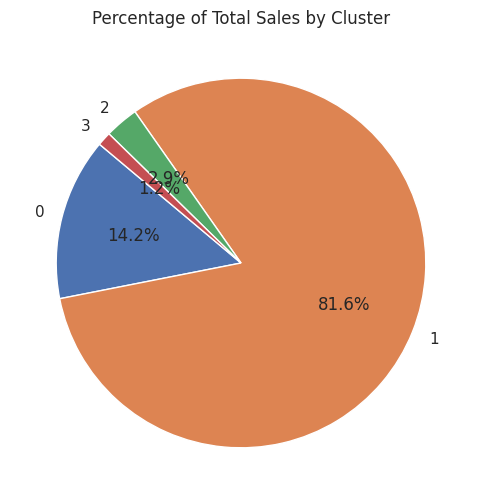

In [ ]:
# 클러스터별 매출 합계 계산
cluster_sales = cluster_df.groupby('cluster')['monetary'].sum().reset_index()

# 전체 매출 계산
total_sales = cluster_sales['monetary'].sum()

# 클러스터별 매출 비율 계산
cluster_sales['percentage_of_total_sales'] = (cluster_sales['monetary'] / total_sales) * 100
print(cluster_sales)

# 시각화
plt.figure(figsize=(8, 6))
plt.pie(cluster_sales['percentage_of_total_sales'], labels=cluster_sales['cluster'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Sales by Cluster')
plt.show()

### 매출 비율(바차트)

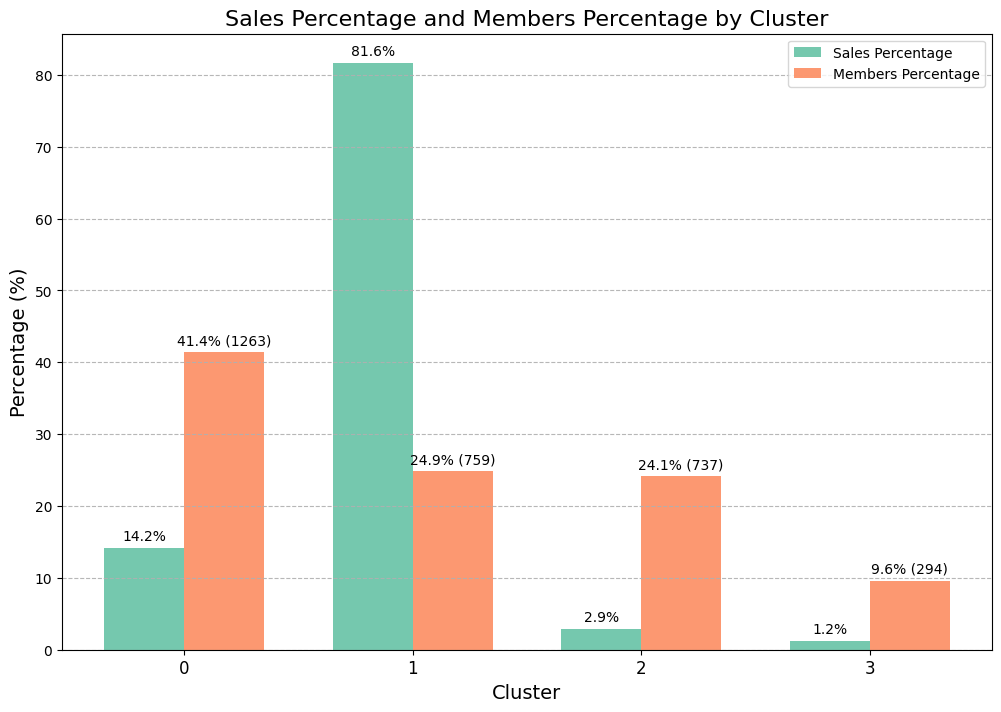

In [ ]:
# 클러스터별 총 매출 계산
cluster_sales = cluster_df.groupby('cluster')['monetary'].sum().reset_index()

# 전체 매출 계산
total_sales = cluster_sales['monetary'].sum()

# 클러스터별 전체 매출에서 차지하는 비율 계산
cluster_sales['percentage_of_total_sales'] = (cluster_sales['monetary'] / total_sales) * 100

# 클러스터별 인원수 계산
cluster_counts = cluster_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# 매출 데이터와 클러스터별 인원수를 병합
cluster_summary = pd.merge(cluster_sales, cluster_counts, on='cluster')

# 전체 인원수 계산
total_members = cluster_summary['count'].sum()

# 클러스터별 전체 인원수에서 차지하는 비율 계산
cluster_summary['percentage_of_total_members'] = (cluster_summary['count'] / total_members) * 100

# 시각화
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(cluster_summary))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

plt.bar([i - bar_width/2 for i in index], cluster_summary['percentage_of_total_sales'],
        width=bar_width, alpha=0.9, color=colors[0], label='Sales Percentage')

plt.bar([i + bar_width/2 for i in index], cluster_summary['percentage_of_total_members'],
        width=bar_width, alpha=0.9, color=colors[1], label='Members Percentage')

for i in range(len(cluster_summary)):
    plt.text(i - bar_width/2, cluster_summary['percentage_of_total_sales'][i] + 1,
             f"{cluster_summary['percentage_of_total_sales'][i]:.1f}%", ha='center', fontsize=10)

for i in range(len(cluster_summary)):
    plt.text(i + bar_width/2, cluster_summary['percentage_of_total_members'][i] + 1,
             f"{cluster_summary['percentage_of_total_members'][i]:.1f}% ({cluster_summary['count'][i]})",
             ha='center', color='black', fontsize=10)

plt.xticks(index, labels=[0, 1, 2, 3], fontsize=12)

plt.title('Sales Percentage and Members Percentage by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend()

plt.grid(True, axis='y', linestyle='--', alpha=0.9)

plt.show()